In [2]:
from pandas.api.types import CategoricalDtype
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import DataFrame, Series 
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
divvy_trips = pd.read_csv('Divvy_Trips_2018.csv')

In [4]:
divvy_trips['trip_id'] = divvy_trips['trip_id'].apply(str)
divvy_trips['start_time'] = pd.to_datetime(divvy_trips['start_time'])
divvy_trips['end_time'] = pd.to_datetime(divvy_trips['end_time'])
divvy_trips['only_date'] = divvy_trips['start_time'].dt.date
divvy_trips['month'] = divvy_trips['start_time'].dt.month
divvy_trips['Week_number'] = divvy_trips['start_time'].dt.week
divvy_trips['hour'] = divvy_trips['start_time'].dt.hour
divvy_trips['day_of_week'] = divvy_trips['start_time'].dt.weekday_name


In [5]:
Create_date_L = DataFrame(divvy_trips['only_date'].value_counts().sort_index()).reset_index()
Create_date_L.columns = ['Date','counts']
Create_date_L.head()

,Date,counts
0,2018-07-01,11652
1,2018-07-02,18616
2,2018-07-03,18108
3,2018-07-04,15513
4,2018-07-05,14231


In [28]:
#Change the data to series format for model over train and fitting
def stat_plot(df):
    series = pd.Series(df)

    #Set last 5 rows as test dataset
    split_data = len(series) - 7 
    train, test = series[0:split_data], series[split_data:]

    model = ARIMA(train, order=(1,0,0))
    fitted = model.fit()  
    fc, se, conf = fitted.forecast(7, alpha=0.05)

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(15,8))
    plt.ylabel('Counts')
    plt.xlabel('Steps')
    plt.title('Created Issues Forecast')
    plt.plot(series, label='Orginal Data')
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series,color='k', alpha=0.1)
    plt.legend(loc='upper left', fontsize=8)

    decomp = seasonal_decompose(series,freq=2)
    decomp.plot()
    plt.show()

In [29]:
Create_Week_L = DataFrame(divvy_trips['Week_number'].value_counts().sort_index()).reset_index()
Create_Week_L.columns = ['Week_number','counts']
Create_Week_L.head()

,Week_number,counts
0,26,11652
1,27,123449
2,28,119926
3,29,115003
4,30,137421


## Weekly data prediction

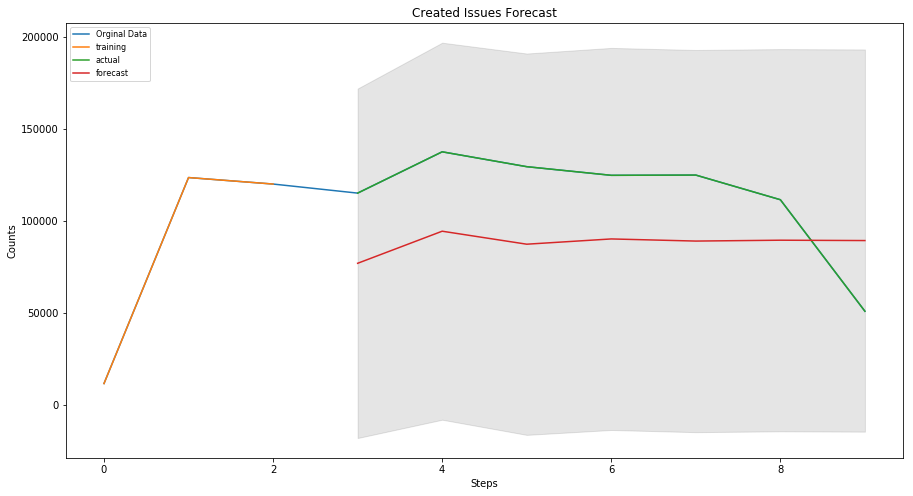

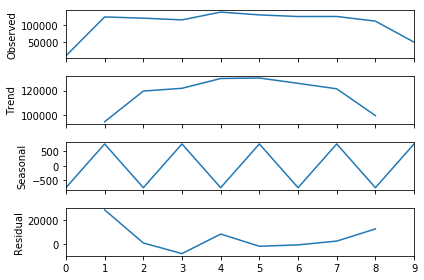

In [30]:
stat_plot(Create_Week_L['counts'])

## Dated data prediction

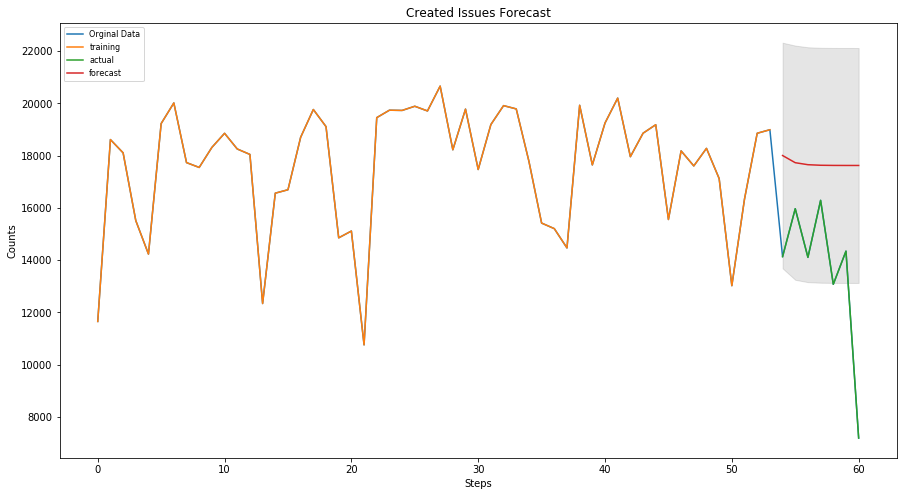

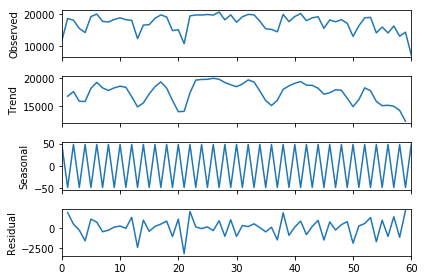

In [34]:
stat_plot(Create_date_L['counts'])